In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',100)
csv_filename = "cpu_091011.csv"
csv_data = pd.read_csv(csv_filename, low_memory=False)
csv_df = pd.DataFrame(csv_data)


print("告警数：",csv_df.shape[0])
print("\n告警指标：")
for i in csv_df.columns:
    print("\t",i)

告警数： 616691

告警指标：
	 Unnamed: 0
	 HY_ID
	 KPI_ID
	 KPI_VALUE
	 COLL_TIME


In [12]:
print("\n告警时间跨度从",csv_df['COLL_TIME'].iloc[0],"到",csv_df['COLL_TIME'].iloc[-1],"\n")


告警时间跨度从 2018-08-31 23:00:01 到 2018-11-30 22:54:01 



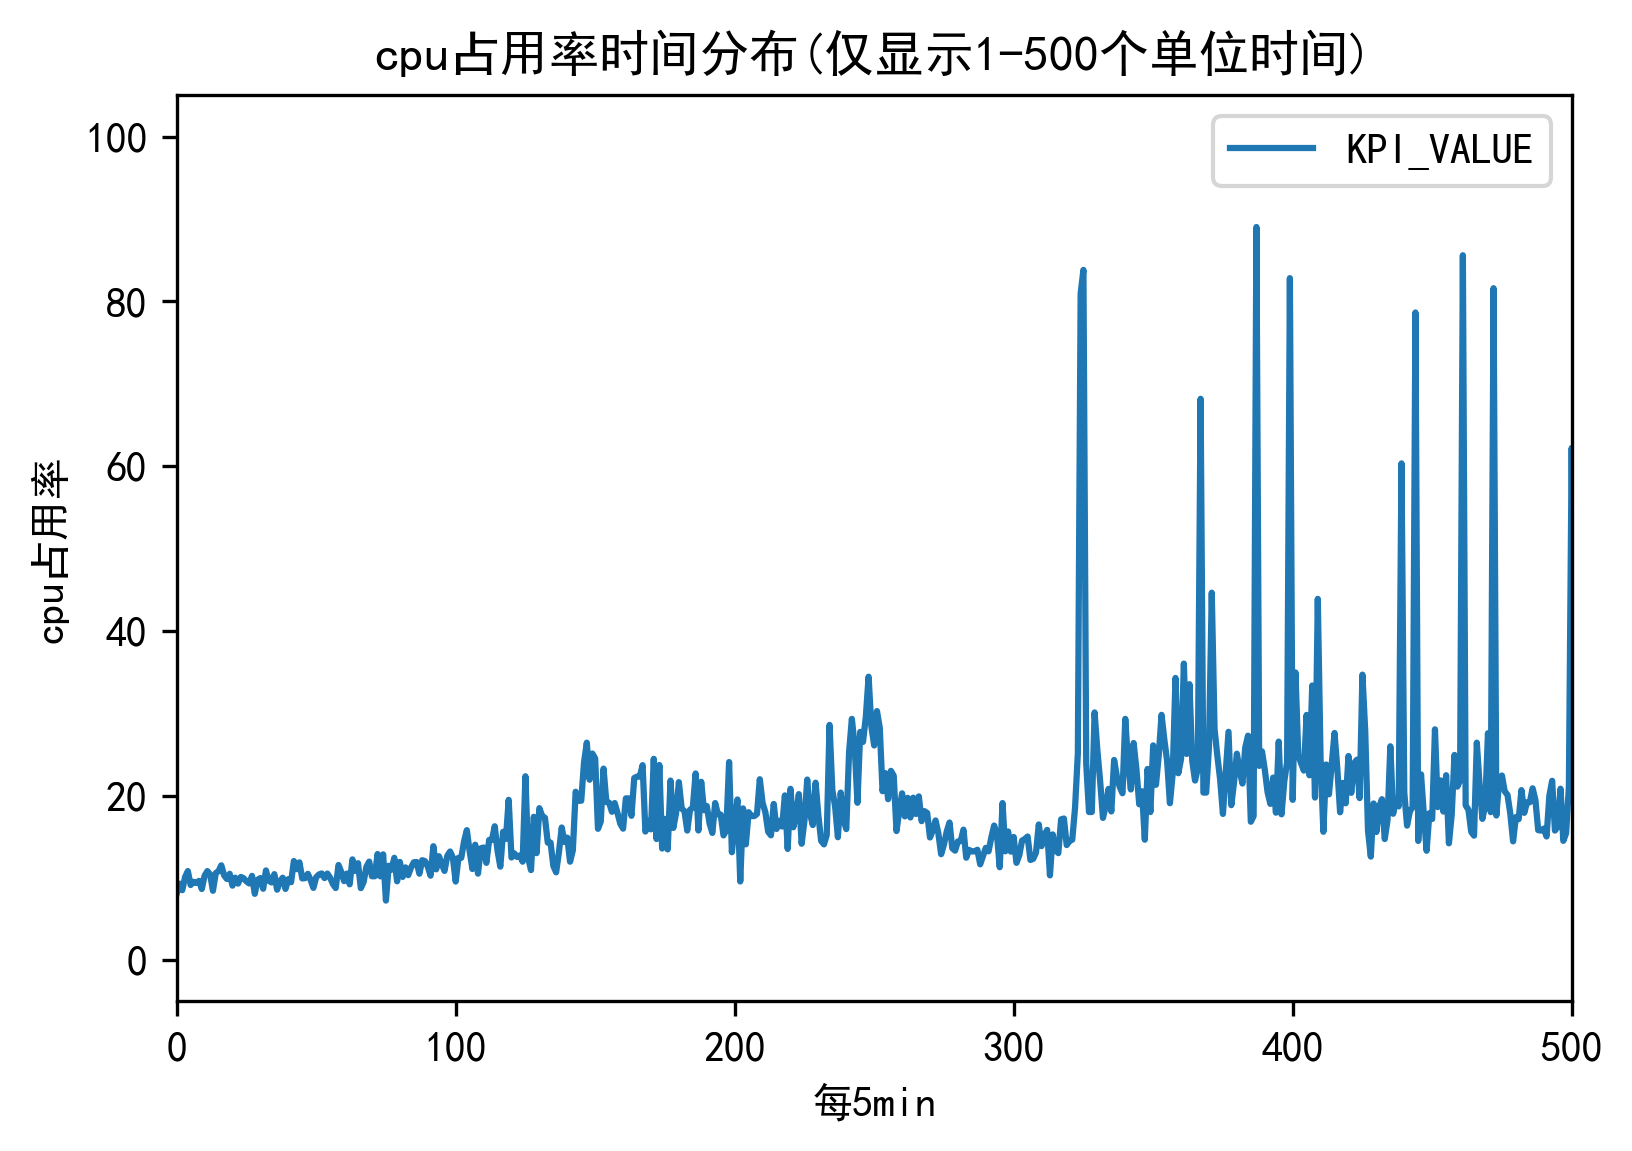

In [47]:
# csv_df['COLL_TIME'] = pd.to_datetime(csv_df['COLL_TIME'],format="%Y/%m/%d %H:%M:%S").agg(lambda x:print(x))
pd.DataFrame(csv_df,columns=['COLL_TIME','KPI_VALUE']).plot()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title("cpu占用率时间分布(仅显示1-500个单位时间)")
plt.xlabel("每5min")
plt.ylabel("cpu占用率")
plt.xlim(0,500)
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
# 指定dpi=200，图片尺寸为 1200*800
# 指定dpi=300，图片尺寸为 1800*1200
plt.savefig("cpu占用率时间分布(仅显示1-500个单位时间).png",dpi=300)
plt.show()

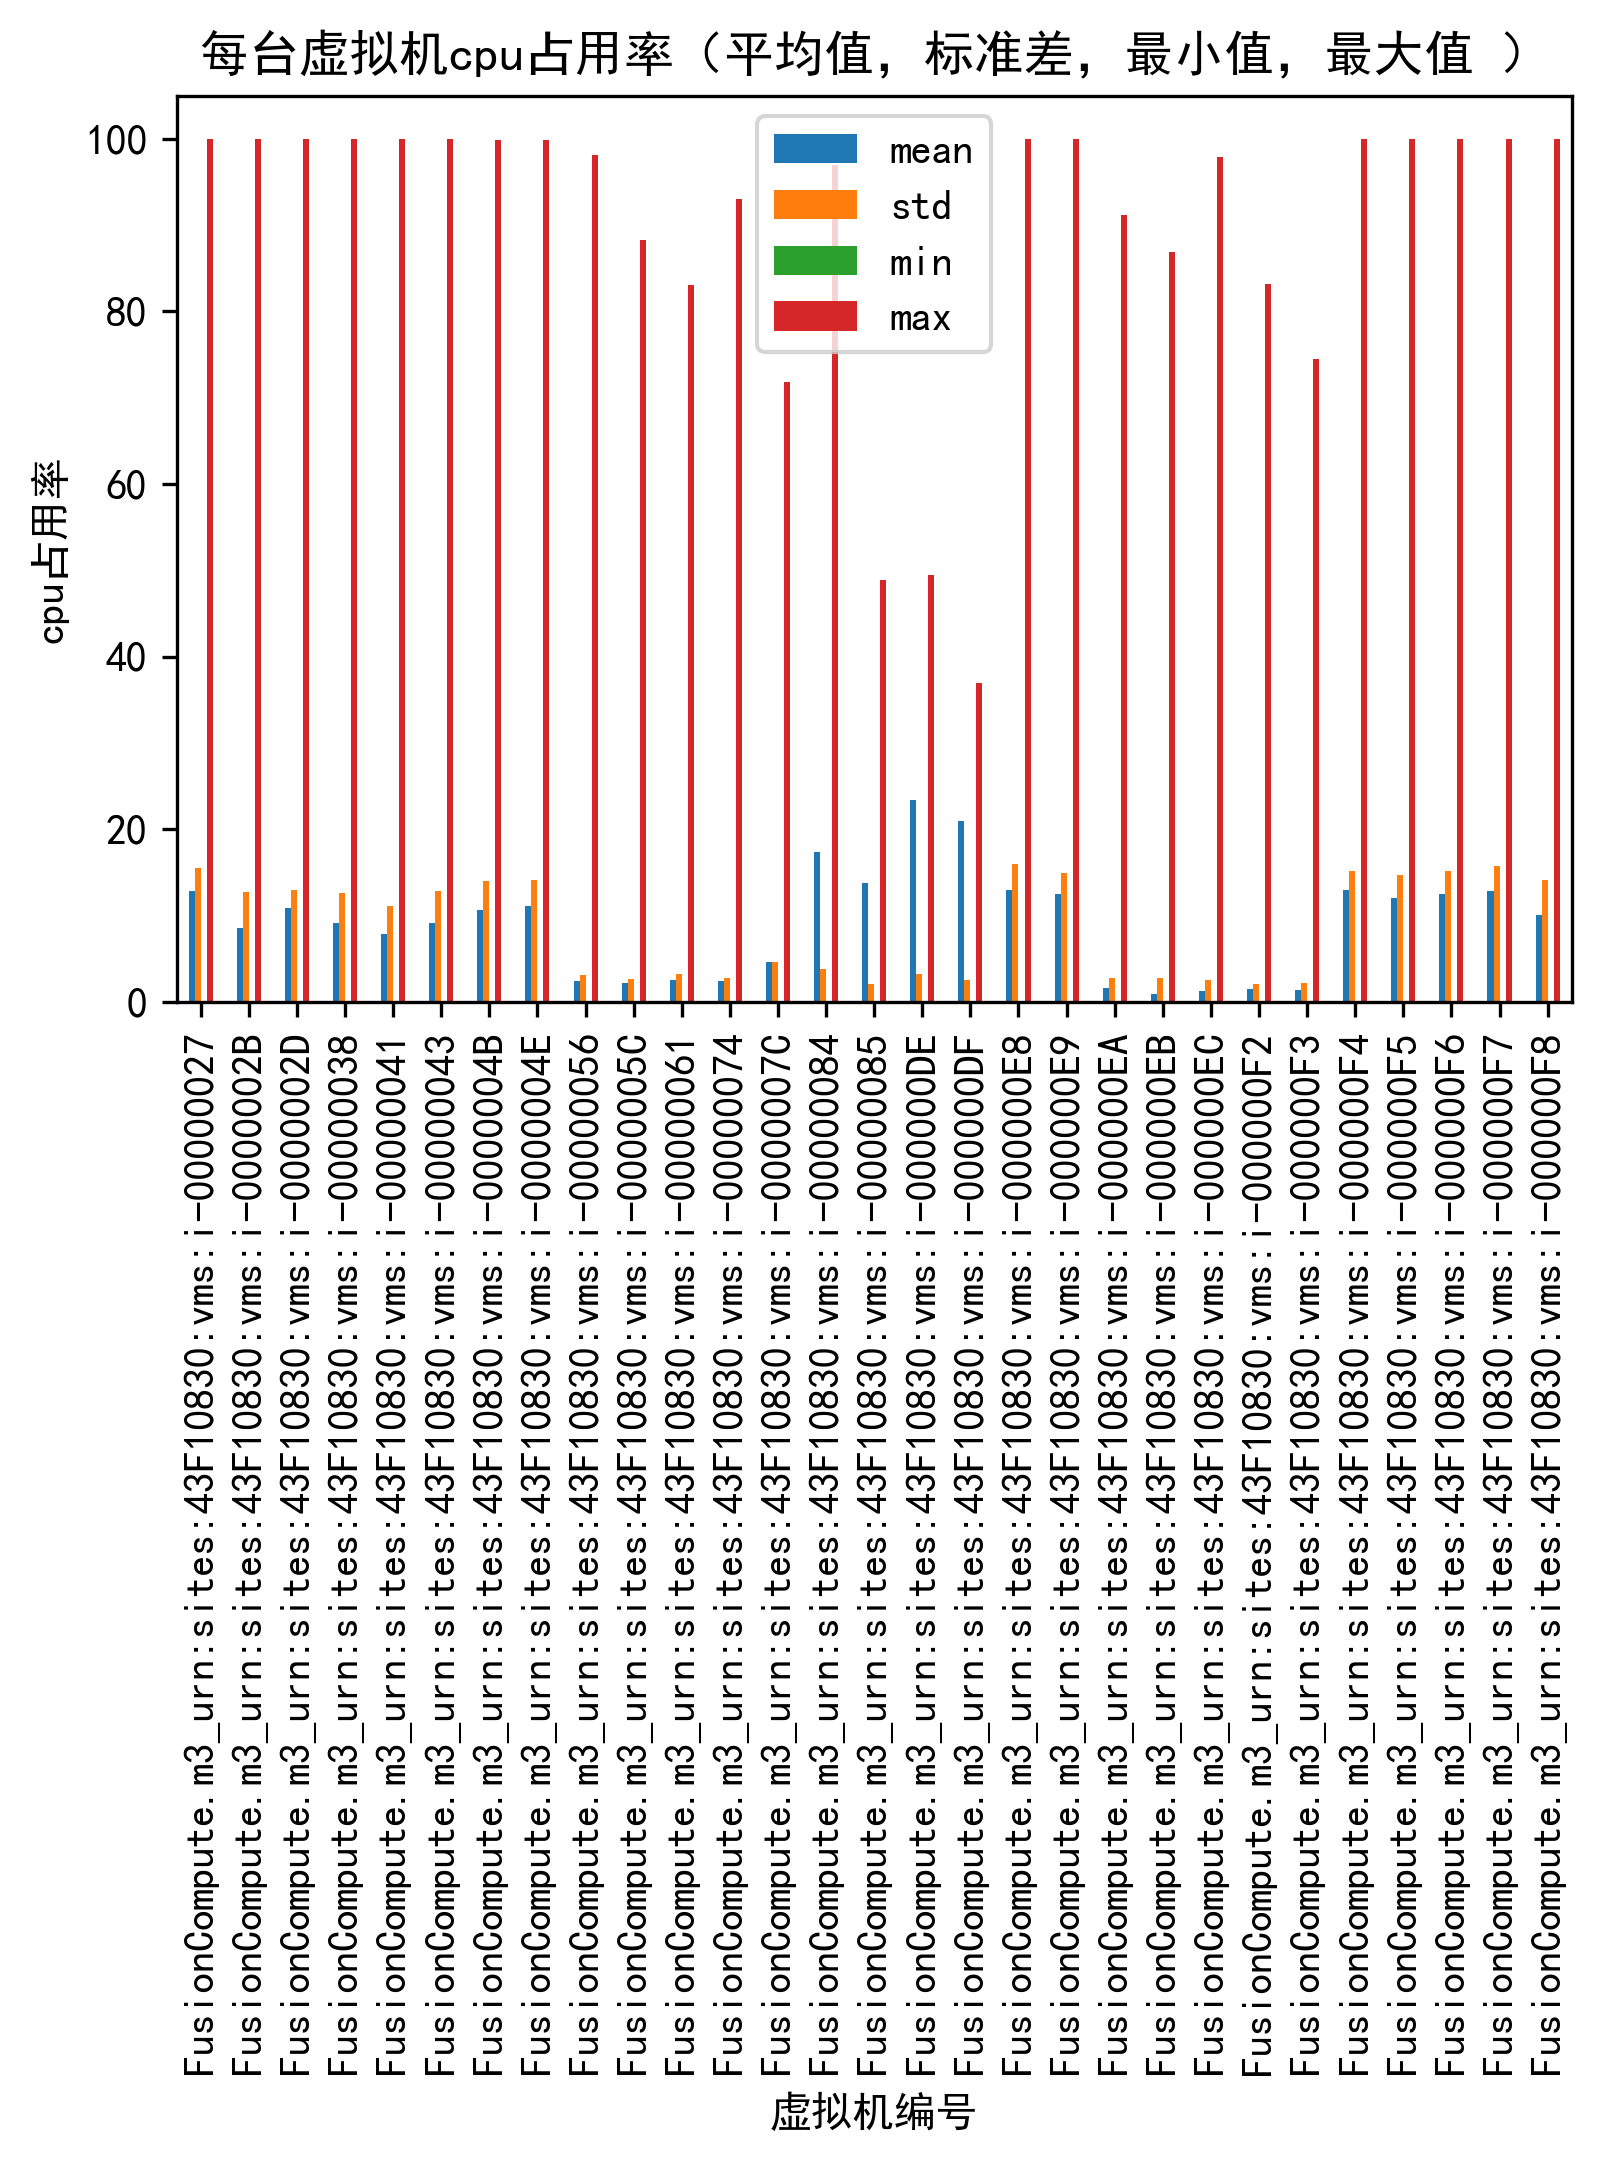

In [42]:
csv_df.groupby('HY_ID')['KPI_VALUE'].agg(['mean','std','min','max']).plot(kind='bar')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title("每台虚拟机cpu占用率（平均值，标准差，最小值，最大值 ）")
plt.xlabel("虚拟机编号")
plt.ylabel("cpu占用率")
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.show()

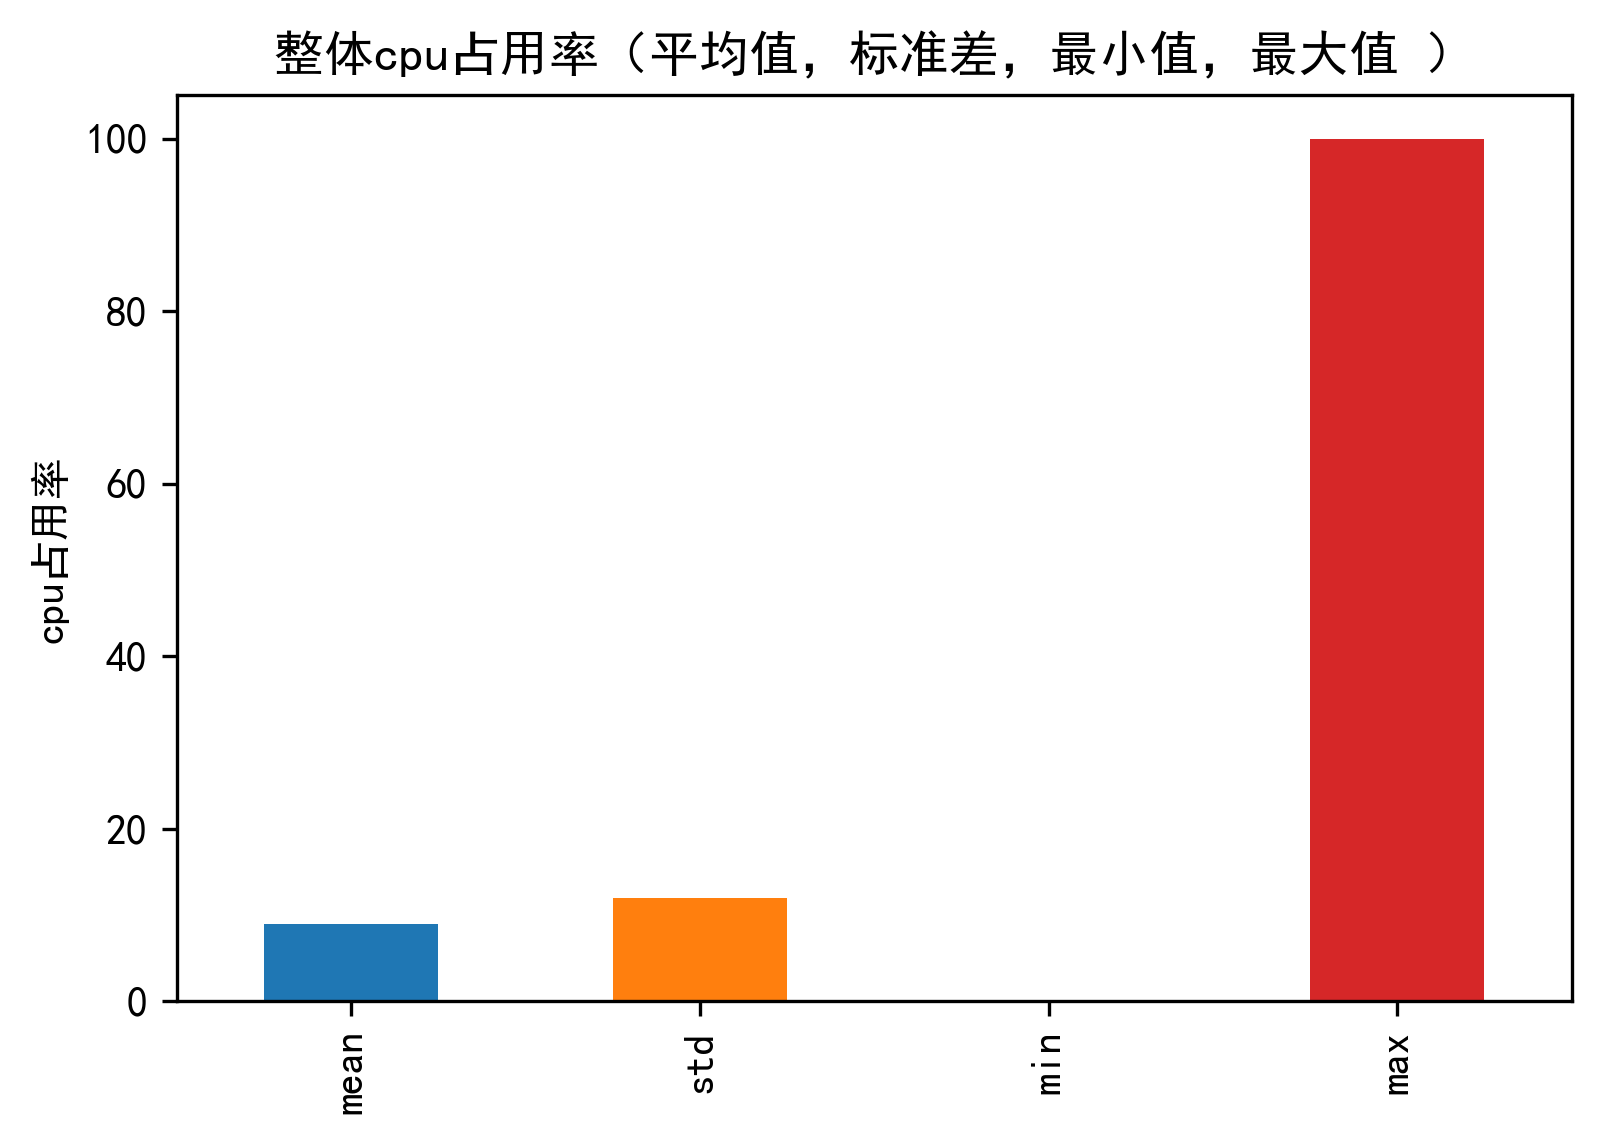

In [43]:
csv_df['KPI_VALUE'].agg(['mean','std','min','max']).plot(kind='bar')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title("整体cpu占用率（平均值，标准差，最小值，最大值 ）")
plt.ylabel("cpu占用率")
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.show()